<a href="https://colab.research.google.com/github/harnalashok/timeseries/blob/main/detrending_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 27th Feb, 2023
# Ref:
# https://analyticsindiamag.com/guide-to-detrending-using-scipy-signal/
# https://koalatea.io/python-detrending-time-series/
#
# Data Sources:
#   Kaggle: https://www.kaggle.com/datasets/redwankarimsony/shampoo-saled-dataset?resource=download
#   github: https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv

In [ ]:
# Objective(s)
#             To remove linear trend from a time series
#             To remove seasonal trend from time series

In [9]:
# 1.0 Call libraries
import scipy

import numpy as np
# Construct a new random generator
from numpy.random import default_rng

# To remove linear trend
from scipy import signal

# To remove seasonal trend
from statsmodels.tsa.seasonal import seasonal_decompose

# Data manipulation
import pandas as pd
#from pandas import datetime

# Graphics
import matplotlib.pyplot as plt 

# Misc
import pathlib

In [11]:
 # Instantiate a random generator
 rng = default_rng() 

In [12]:
# Get normally distributed data points:

npoints = 1000
noise = rng.standard_normal(npoints)
noise[:10]

array([-1.24442945,  1.73771818, -0.07156016, -1.2288205 , -0.78621584,
        1.44142123,  0.16335957, -0.78845549,  0.7587042 ,  0.09447098])

In [15]:
# Generate 1000 equally spaced points but then
# add noise to them 
y = 3 + 2*np.linspace(0, 1, npoints) + noise
y[:5]

array([1.75557055, 4.73972018, 2.93244384, 1.77718551, 2.22179217])

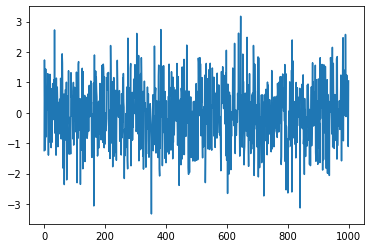

In [14]:
 plt.plot(noise)
 plt.show() 

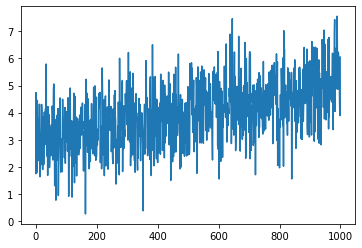

In [17]:
# Also plot y
plt.plot(y)
plt.show() 

For syntax of `scipy.signal.detrend` see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html)

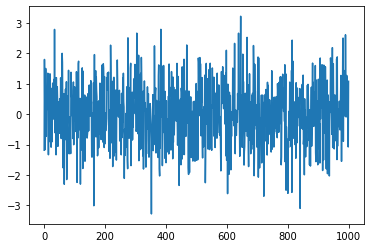

In [18]:
# Detrend y and plot to see:

z = scipy.signal.detrend(y)
plt.plot(z)
plt.show()

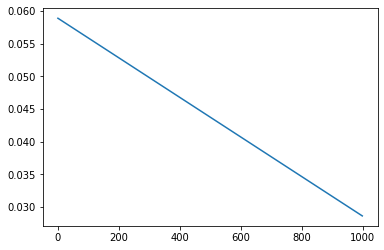

In [20]:
# We can also remove noise
k =(z - noise)
plt.plot(k)
plt.show() 

### Exercise: Use Ljung-Box test on y and z to check if signals are stationary or not.

## USe shampoo-sales data


In [25]:
# Mount your gdrive:

from google.colab import drive
drive.mount('/gdrive')

MessageError: ignored

In [ ]:
# Set the path to data folder:
path = "/gdrive/MyDrive/Colab_data_files/timeseries"
path = pathlib.Path(path)

In [ ]:
# Read data and check:
series = pd.read_csv("/gdrive/MyDrive/Colab_data_files/timeseries/shampoo_sales.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head(10) 

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
Name: Sales, dtype: float64

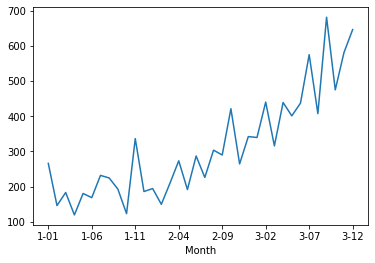

In [ ]:
 # Plot data
 series.plot()
 pyplot.show() 

In [ ]:
# Detrend and plot
x = series.values
y=(signal.detrend(x, axis=-1, type='linear', bp=0))
y

array([ 164.78378378,   32.60471042,   57.72563707,  -18.15343629,
         30.76749035,    6.88841699,   58.10934363,   38.73027027,
         -5.04880309,  -87.02787645,  114.49305019,  -48.18602317,
        -51.86509653, -108.74416988,  -60.22324324,   -9.1023166 ,
       -103.08138996,  -19.56046332,  -92.63953668,  -27.11861004,
        -52.8976834 ,   66.72324324, -102.45583012,  -36.73490347,
        -51.41397683,   37.20694981,  -99.37212355,   11.94880309,
        -38.13027027,  -14.10934363,  111.91158301,  -68.06749035,
        194.25343629,  -24.52563707,   69.39528958,  122.91621622])

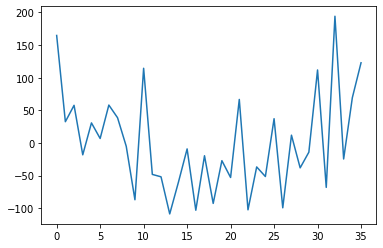

In [ ]:
plt.plot(y)
plt.show() 

In [ ]:
x = series.values
y=(signal.detrend(x, axis=-1, type='constant', bp=0))
y 

array([ -46.6, -166.7, -129.5, -193.3, -132.3, -144.1,  -80.8,  -88.1,
       -119.8, -189.7,   23.9, -126.7, -118.3, -163.1, -102.5,  -39.3,
       -121.2,  -25.6,  -86.6,   -9. ,  -22.7,  109. ,  -48.1,   29.7,
         27.1,  127.8,    3.3,  126.7,   88.7,  124.8,  262.9,   95. ,
        369.4,  162.7,  268.7,  334.3])

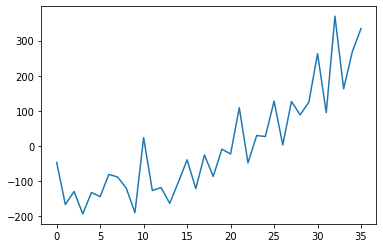

In [ ]:
plt.plot(y)
plt.show() 

For the following example, see this [link](https://koalatea.io/python-detrending-time-series/)

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')

df.month = pd.to_datetime(df.month)
df = df.set_index('month')
df.head()

,milk_prod_per_cow_kg
month,
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15


<AxesSubplot:xlabel='month'>

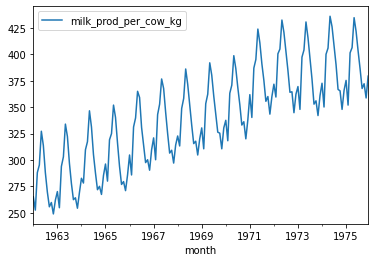

In [ ]:
df.plot()

After removing a linear trend, we also want to remove seasonal trend so that we can model the data. To do this we can use the seasonal_decompose function from the statsmodels package.

<AxesSubplot:>

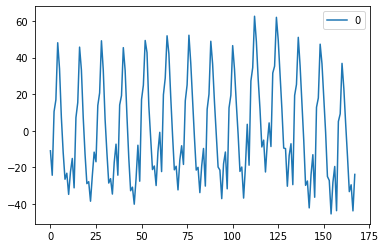

In [ ]:
detrended = signal.detrend(df.milk_prod_per_cow_kg)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()

## Removing a Seasonal Trend
(As against linear trend)

Above data still has seasonality trend

In [ ]:
res = seasonal_decompose(df.milk_prod_per_cow_kg,
                         model='multiplicative',
                         extrapolate_trend='freq'
                         )


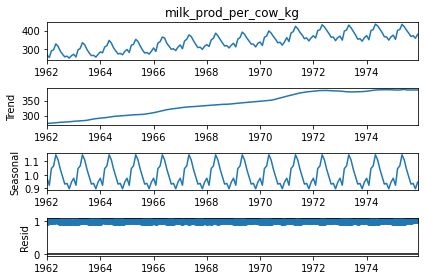

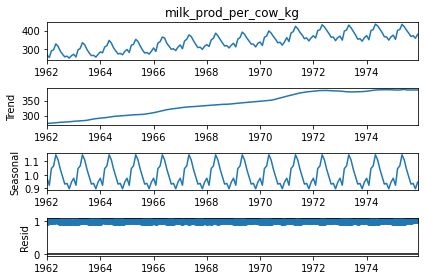

In [ ]:
res.plot()

<AxesSubplot:xlabel='month'>

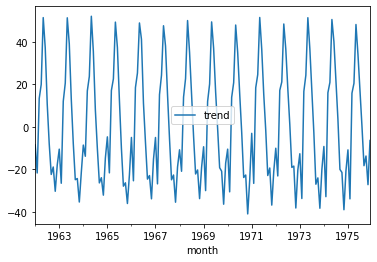

In [ ]:
seasonal_detrended = df.milk_prod_per_cow_kg.values - res.trend
seasonal_detrended_df = pd.DataFrame(seasonal_detrended)
seasonal_detrended_df.plot()

In [ ]:
############## I am done ############3